In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/steam/"

In [2]:
games = pd.read_csv(data_path + "games.csv")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [3]:
# Cast appropriate data types
games['title'] = games['title'].astype('string')
games['rating'] = games['rating'].astype('string')
games['date_release'] = games['date_release'].astype('string')
games['date_release'] = pd.to_datetime(games['date_release'])

In [4]:
# Check for null values
null_check = games.isnull().sum()
missing_data_table = pd.concat([null_check], axis = 1, keys = ['Total Missing Data'])
missing_data_table

,Total Missing Data
app_id,0
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0
user_reviews,0
price_final,0


In [5]:
# Check for duplicate values
duplicate_check = games.duplicated().sum()
print(f"There are {duplicate_check} duplicate rows within this dataset")

There are 0 duplicate rows within this dataset


In [6]:
games.describe()

,app_id,date_release,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,2019-03-13 03:53:57.112753664,77.052033,1.824425e+03,8.620325,8.726788,5.592212
min,1.000000e+01,1997-06-30 00:00:00,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,2017-03-21 00:00:00,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,2019-08-23 00:00:00,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,2021-09-21 00:00:00,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,2023-10-24 00:00:00,100.000000,7.494460e+06,299.990000,299.990000,90.000000
std,6.103249e+05,NaN,18.253592,4.007352e+04,11.514164,11.507021,18.606679


In [7]:
recommendations = pd.read_csv(data_path + "recommendations.csv")
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [8]:
recommendations['date'] = recommendations['date'].astype('string')
recommendations['date'] = pd.to_datetime(recommendations['date'])

In [9]:
# Check for null values
null_check = recommendations.isnull().sum()
missing_data_table = pd.concat([null_check], axis = 1, keys = ['Total Missing Data'])
missing_data_table

,Total Missing Data
app_id,0
helpful,0
funny,0
date,0
is_recommended,0
hours,0
user_id,0
review_id,0


In [10]:
# Check for duplicate values
duplicate_check = recommendations.duplicated().sum()
print(f"There are {duplicate_check} duplicate rows within this dataset")

There are 0 duplicate rows within this dataset


In [11]:
recommendations.describe()

,app_id,helpful,funny,date,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,41154794,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,2020-02-12 18:14:56.361188352,1.006022e+02,7.450576e+06,2.057740e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,2010-10-15 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,2018-10-29 00:00:00,7.800000e+00,4.287256e+06,1.028870e+07
50%,4.351500e+05,0.000000e+00,0.000000e+00,2020-10-08 00:00:00,2.730000e+01,7.546446e+06,2.057740e+07
75%,9.331100e+05,0.000000e+00,0.000000e+00,2021-12-05 00:00:00,9.920000e+01,1.096877e+07,3.086609e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,2022-12-31 00:00:00,1.000000e+03,1.430606e+07,4.115479e+07
std,4.729233e+05,4.693649e+01,2.867060e+01,NaN,1.761675e+02,4.010685e+06,1.188037e+07


In [12]:
users = pd.read_csv(data_path + "users.csv")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB


In [13]:
users.describe()

,user_id,products,reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [14]:
rec_users = pd.merge(users, 
                     recommendations, 
                     on="user_id", 
                     how="inner"
                     )

hours = rec_users.groupby('user_id')['hours'].sum().reset_index()
hours = hours[hours['hours'] > 0]

In [15]:
hours['log_hours'] = np.log1p(hours['hours'])

### Exploring hours played

How much do users play the games that they own? 

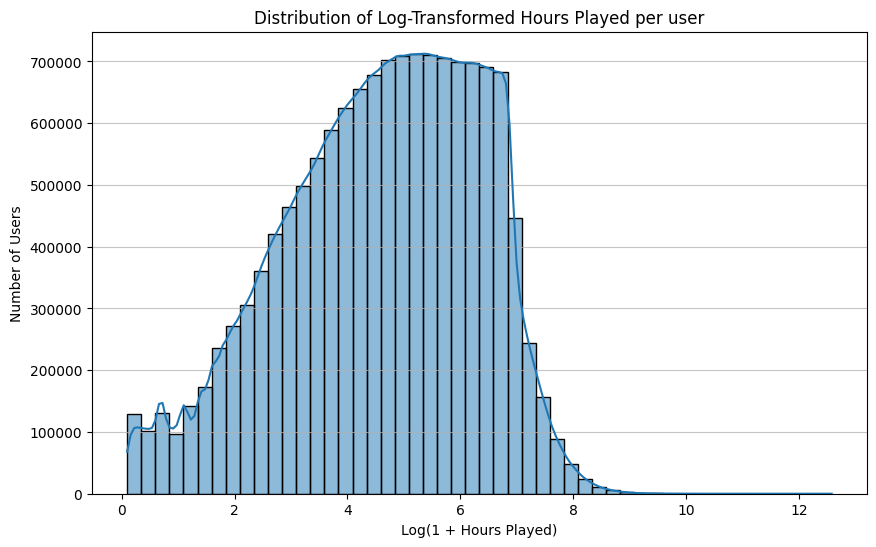

In [16]:
# Plot the distribution of hours played
plt.figure(figsize=(10, 6))
sns.histplot(hours['log_hours'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Hours Played per user')
plt.xlabel('Log(1 + Hours Played)')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

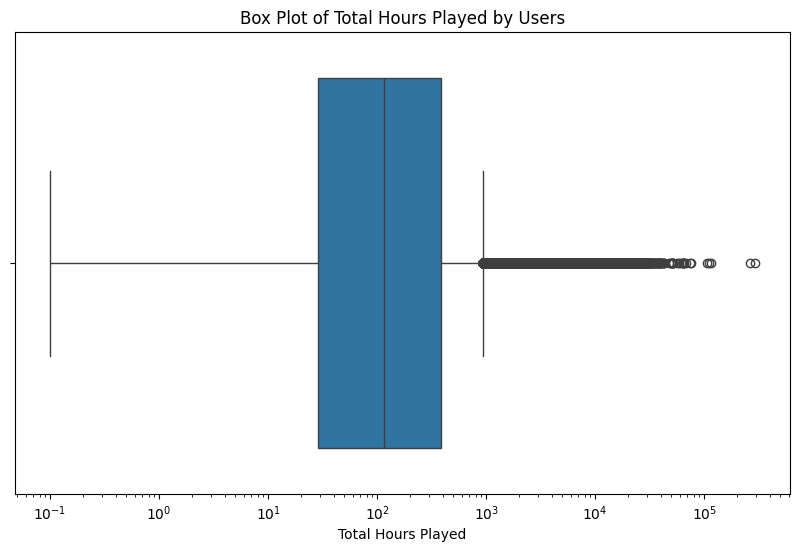

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=hours['hours'])
plt.title('Box Plot of Total Hours Played by Users')
plt.xlabel('Total Hours Played')
plt.xscale('log') # Use a log scale for the x-axis to better visualize the spread
plt.show()

### Games Owned and Reviews Left

Do users show any meaningful relationship between the number of games they own and the amount of reviews they leave?

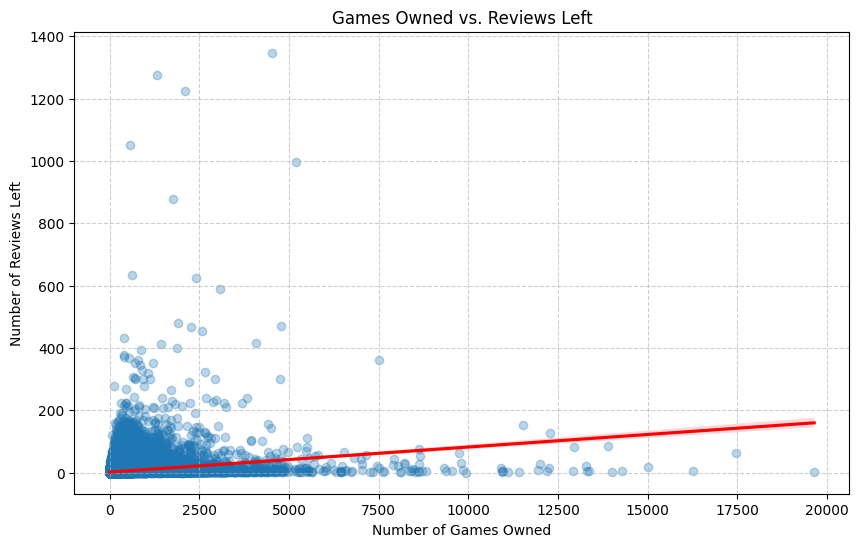

In [19]:
# There are 14M users, too many to plot
sample_size = 500000
sampled_users = users.sample(n=sample_size, random_state=42) 

# Create a scatterplot of 'products' (games owned) vs 'reviews' (reviews left)
plt.figure(figsize=(10, 6))
sns.regplot(x='products', y='reviews', data=sampled_users, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Games Owned vs. Reviews Left')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews Left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Distribution of reviews

How are the reviews distributed on average? Do they skew a certain direction?

/tmp/ipykernel_175133/161037611.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_rating_counts.index, y=log_rating_counts.values, palette='Paired')


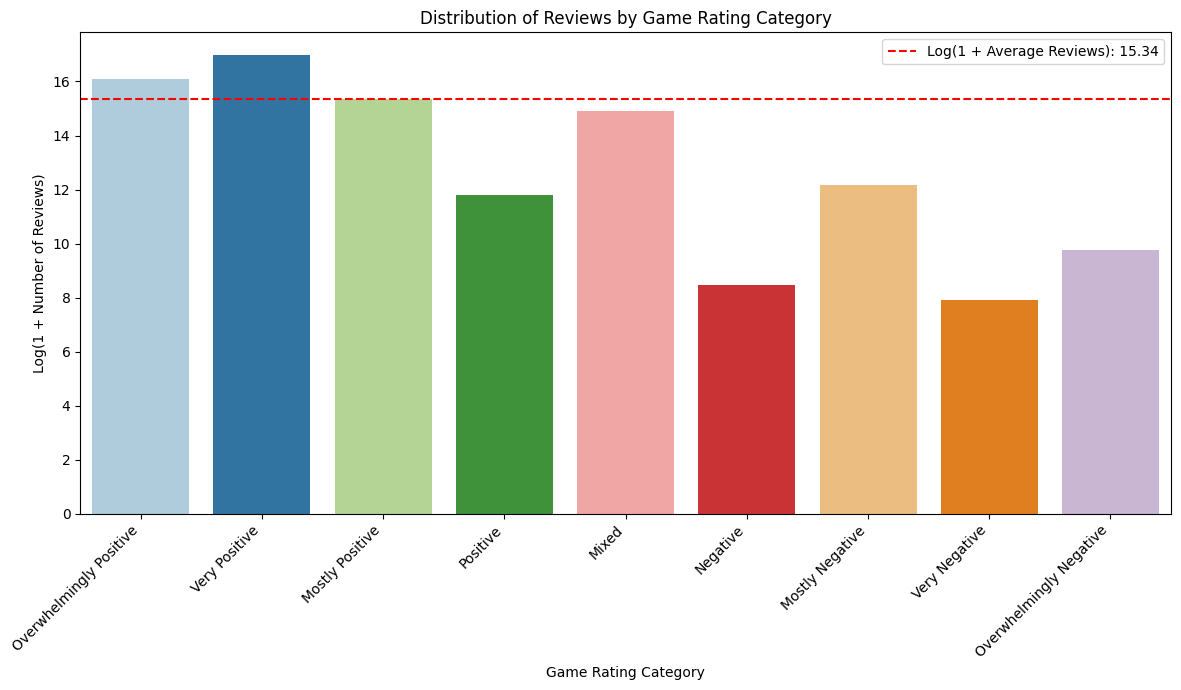

In [26]:
rec_games = pd.merge(recommendations, games[['app_id', 'rating']], on='app_id', how='inner')

# Define the desired order of rating categories
category_order = [
    'Overwhelmingly Positive',
    'Very Positive',
    'Mostly Positive',
    'Positive',
    'Mixed',
    'Negative',
    'Mostly Negative',
    'Very Negative',
    'Overwhelmingly Negative'
]

# Convert the 'rating' column to a categorical type with the specified order
# This ensures the plot maintains the desired order
rec_games['rating'] = pd.Categorical(
    rec_games['rating'],
    categories=category_order,
    ordered=True
)

# Count the number of reviews in each category
# Group by the ordered 'rating' column and count the occurrences
rating_counts = rec_games['rating'].value_counts().sort_index()
log_rating_counts = np.log1p(rating_counts)
mean_original_reviews = rating_counts.mean()
log_mean_reviews = np.log1p(mean_original_reviews)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=log_rating_counts.index, y=log_rating_counts.values, palette='Paired')

plt.axhline(
    log_mean_reviews,
    color='red',
    linestyle='--',
    label=f'Log(1 + Average Reviews): {log_mean_reviews:.2f}'
)

plt.title('Distribution of Reviews by Game Rating Category')
plt.xlabel('Game Rating Category')
plt.ylabel('Log(1 + Number of Reviews)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.legend()
plt.show()

In [27]:
print("\nLog-transformed number of reviews in each category:")
print(log_rating_counts)


Log-transformed number of reviews in each category:
rating
Overwhelmingly Positive    16.089906
Very Positive              16.971264
Mostly Positive            15.337365
Positive                   11.802314
Mixed                      14.924024
Negative                    8.452548
Mostly Negative            12.172164
Very Negative               7.918629
Overwhelmingly Negative     9.750802
Name: count, dtype: float64


### Release Dates

When during the year are games most often released? Is there a certain seasonality that dominates release timelines?

/tmp/ipykernel_175133/155294040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_filtered['release_year_month'] = games_filtered['date_release'].dt.to_period('M')


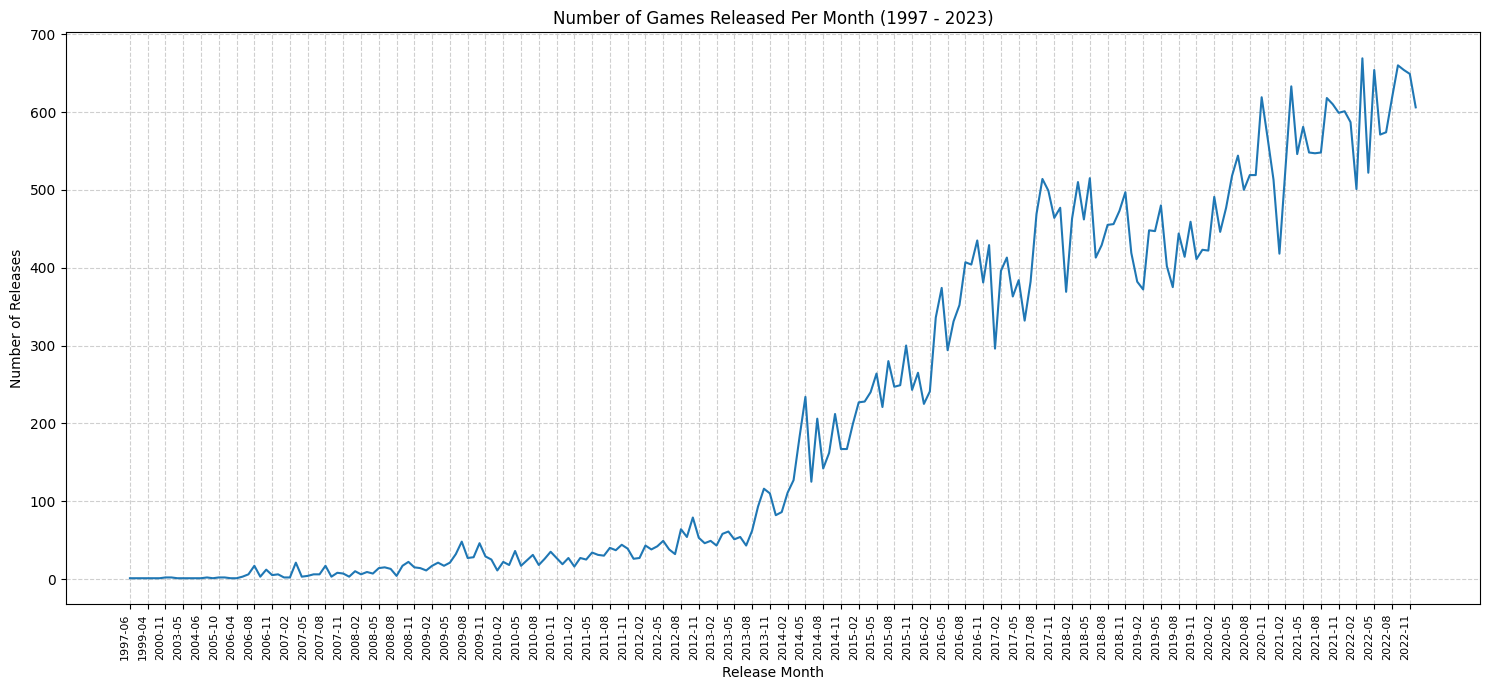

In [38]:
games_filtered = games[games['date_release'] < '2023-01-01']

games_filtered['release_year_month'] = games_filtered['date_release'].dt.to_period('M')
monthly_releases = games_filtered['release_year_month'].value_counts().sort_index()
monthly_releases = monthly_releases.reset_index()
monthly_releases.columns = ['month', 'num_releases']
tick_positions = monthly_releases.index[::3]
tick_labels = [m.strftime('%Y-%m') for m in monthly_releases['month'].iloc[::3]]
monthly_releases['month'] = monthly_releases['month'].astype(str)
plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='num_releases', data=monthly_releases)
plt.title('Number of Games Released Per Month (1997 - 2023)')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.xticks(tick_positions, tick_labels, rotation=90, ha='right', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipykernel_175133/1350825581.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_month_name', y='total_releases', data=monthly_releases_aggregated, palette='Paired')


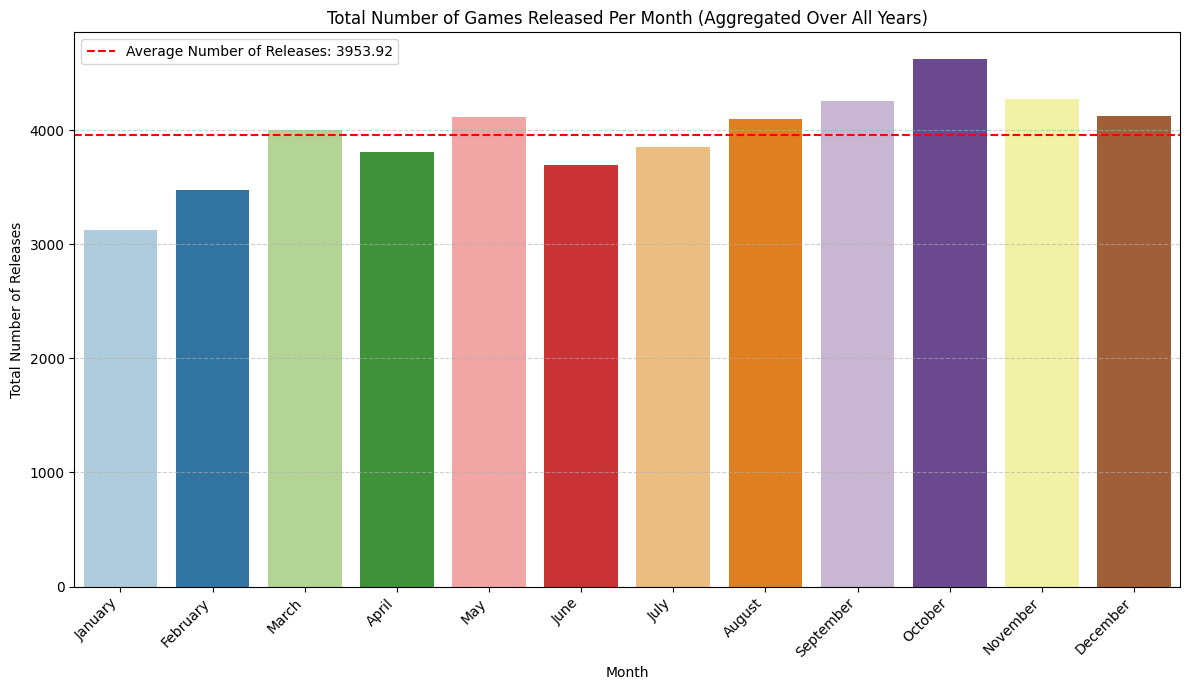

In [43]:
games['release_month_num'] = games['date_release'].dt.month

# Get the month name for better labels on the plot
games['release_month_name'] = games['date_release'].dt.strftime('%B')

games_filtered = games[games['date_release'] < '2023-01-01']

# Aggregate the count of releases per month over all years
# Group by both month number and month name to ensure correct sorting and labels
monthly_releases_aggregated = games_filtered.groupby(['release_month_num', 'release_month_name']).size().reset_index(name='total_releases')
mean_total_releases = monthly_releases_aggregated['total_releases'].mean()

plt.figure(figsize=(12, 7))
sns.barplot(x='release_month_name', y='total_releases', data=monthly_releases_aggregated, palette='Paired')
plt.axhline(
    mean_total_releases,
    color='red',
    linestyle='--',
    label=f'Average Number of Releases: {mean_total_releases.mean():.2f}'
)
plt.title('Total Number of Games Released Per Month (Aggregated Over All Years)')
plt.xlabel('Month')
plt.ylabel('Total Number of Releases')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.legend()
plt.show()

Top 100 Games by Total Playtime and Their Review Scores:
     app_id  total_playtime_hours                             title  \
0       440           101809977.6                   Team Fortress 2   
1       730            94260307.3  Counter-Strike: Global Offensive   
2       570            93072785.4                            Dota 2   
3    252490            92944004.6                              Rust   
4    359550            68445823.3   Tom Clancy's Rainbow Six® Siege   
..      ...                   ...                               ...   
95   389730             9786027.4                          TEKKEN 7   
96   629520             9514963.7                          Soundpad   
97   262060             9500230.6                  Darkest Dungeon®   
98   457140             9341851.2               Oxygen Not Included   
99  1238810             9221586.7                    Battlefield™ V   

                     rating  
0             Very Positive  
1             Very Positive  


/tmp/ipykernel_175133/2279110586.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=top_playtime_games_details, palette='Paired')


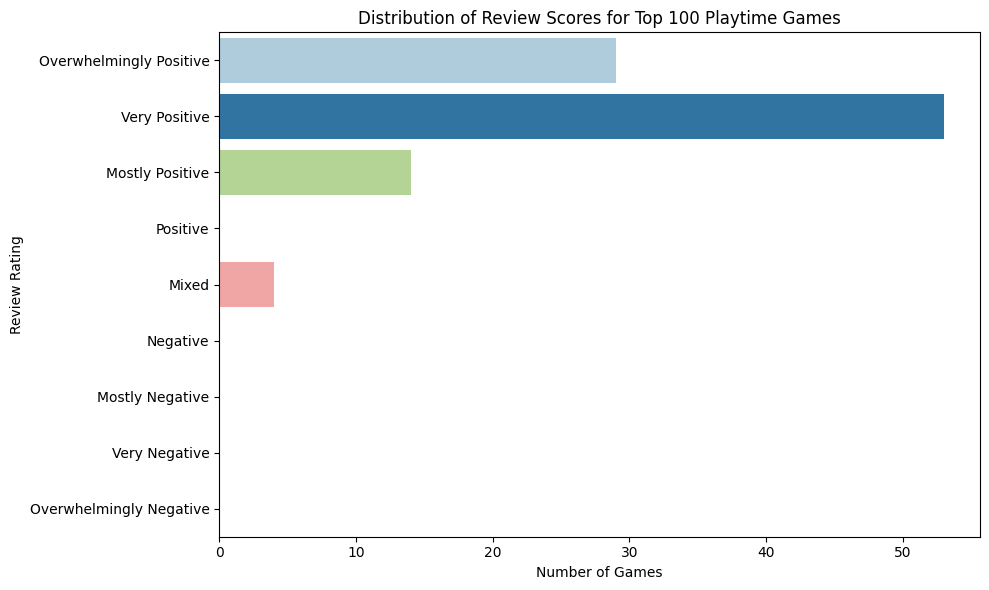

In [49]:
total_hours_per_game = recommendations.groupby('app_id')['hours'].sum().reset_index()
total_hours_per_game.rename(columns={'hours': 'total_playtime_hours'}, inplace=True)

N = 100 
top_playtime_games = total_hours_per_game.sort_values(by='total_playtime_hours', ascending=False).head(N)


top_playtime_games_details = pd.merge(
    top_playtime_games,
    games[['app_id', 'title', 'rating']],
    on='app_id',
    how='inner'
)

top_playtime_games_details['rating'] = pd.Categorical(
    top_playtime_games_details['rating'],
    categories=category_order,
    ordered=True
)

print(f"Top {N} Games by Total Playtime and Their Review Scores:")
print(top_playtime_games_details)

if not top_playtime_games_details.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='rating', data=top_playtime_games_details, palette='Paired')
    plt.title(f'Distribution of Review Scores for Top {N} Playtime Games')
    plt.xlabel('Number of Games')
    plt.ylabel('Review Rating')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo games found in the top playtime list to analyze ratings.")

Top 100 Games by Total Playtime and Their Review Scores:
     app_id  total_playtime_hours                     title           rating
0   1281990                   0.0             CoronaFighter         Positive
1    910190                   0.0               Hive Slayer         Positive
2    546240                   0.0               The Journey  Mostly Negative
3    871620                   0.0          Volcano Eruption  Mostly Negative
4   1193510                   0.0  Antarctic Heritage Trust         Positive
..      ...                   ...                       ...              ...
95   567810                   0.1     Furi - One More Fight    Very Positive
96  1278090                   0.2          Collection Quest  Mostly Positive
97  2132710                   0.2                SokoMelody         Positive
98  1564840                   0.2       Dreams Of Adventure            Mixed
99  1414280                   0.2          Fishing Together         Positive

[100 rows x 4 colu

/tmp/ipykernel_175133/3623279839.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=bot_playtime_games_details, palette='Paired')


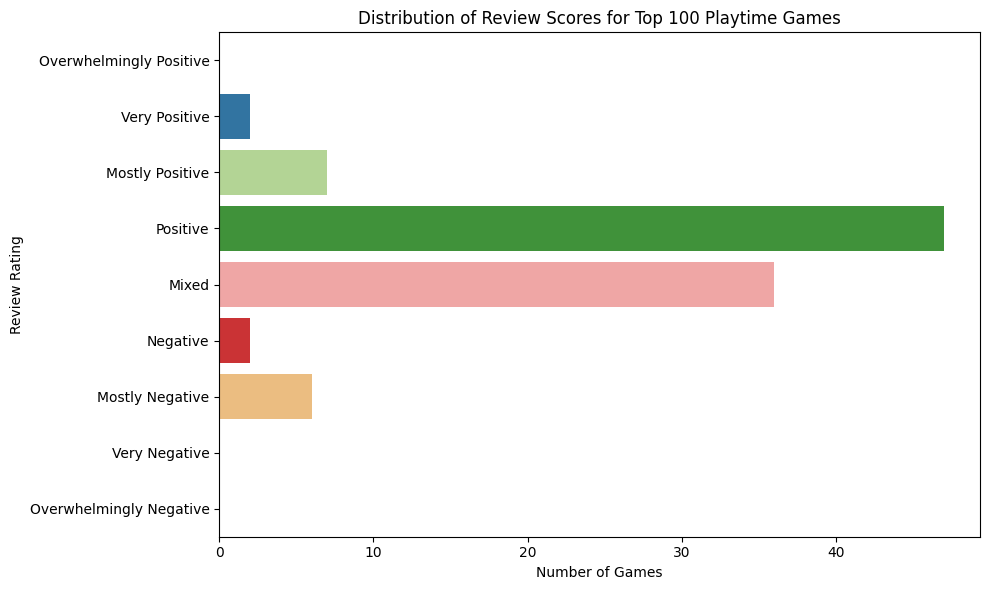

In [ ]:
N = 100 
bot_playtime_games = total_hours_per_game.sort_values(by='total_playtime_hours', ascending=True).head(N)


bot_playtime_games_details = pd.merge(
    bot_playtime_games,
    games[['app_id', 'title', 'rating']],
    on='app_id',
    how='inner'
)

bot_playtime_games_details['rating'] = pd.Categorical(
    bot_playtime_games_details['rating'],
    categories=category_order,
    ordered=True
)

print(f"Top {N} Games by Total Playtime and Their Review Scores:")
print(bot_playtime_games_details)

if not bot_playtime_games_details.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='rating', data=bot_playtime_games_details, palette='Paired')
    plt.title(f'Distribution of Review Scores for Bottom {N} Playtime Games')
    plt.xlabel('Number of Games')
    plt.ylabel('Review Rating')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo games found in the top playtime list to analyze ratings.")